In [1]:
from yty_manim.application.page_replacement import *
from yty_manim.basic_unit.squ_tex import *
from yty_manim.basic_unit.screen_cycle import *
from manim import *

Manim Community v0.18.0

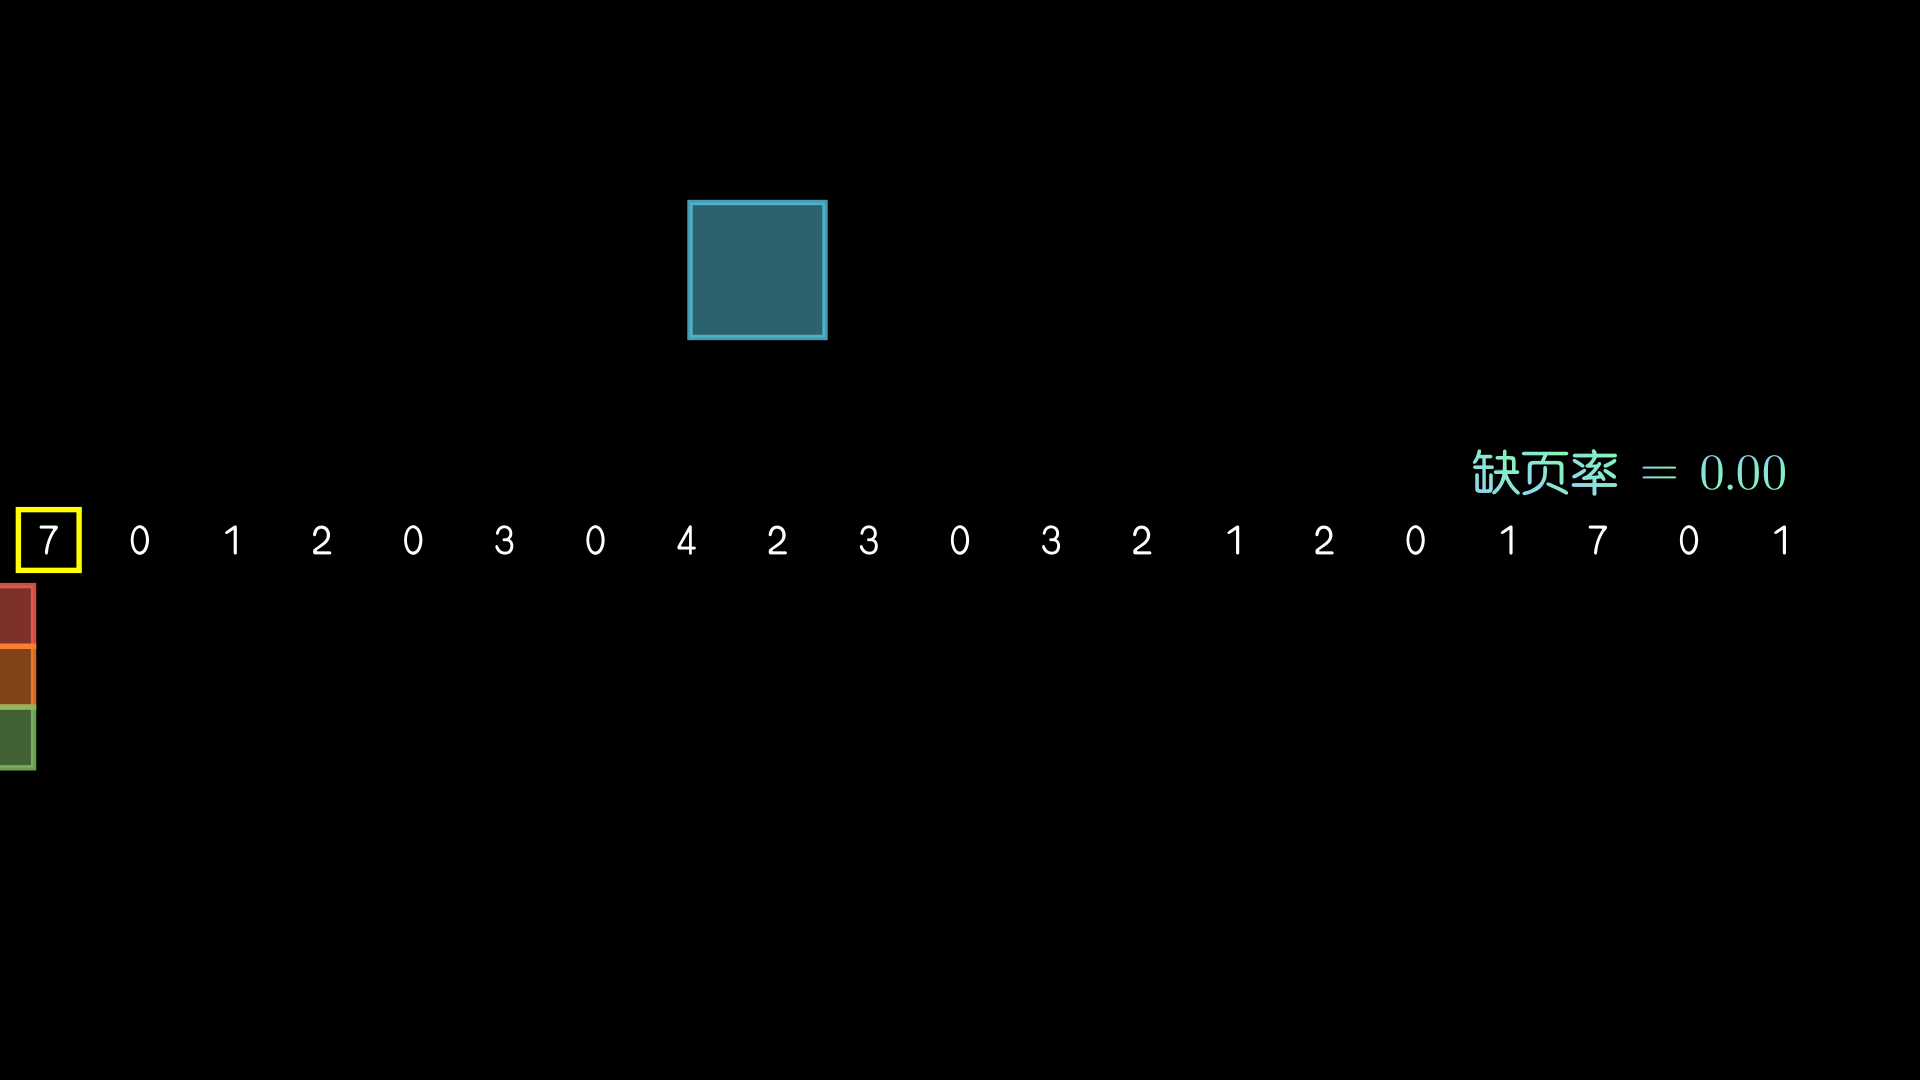

In [4]:
%%manim -qh -v WARNING DeBug
class DeBug(Scene):
    def construct(self):
        input_lst = [7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "]
        s = LruPageReplacement(input_lst,page_frame_num=3)
        self.add(s)

In [3]:
%%manim -qh -v WARNING PageTest
class PageTest(Scene):
    def construct(self):
        input_lst = [7,0,1,2,0,3," "]
        p = FifoPageReplacement(input_lst,page_frame_num=3)
        self.add(p)
        self.wait()
        for i in range(len(input_lst)-1):
            step_on(self,p,i,0.5)

In [ ]:
%%manim -qh -v WARNING PageInit
class PageInit(Scene):
    def construct(self):
        input_lst = [7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "]
        p = Page(input_lst,page_frame_num=3)
        self.add(p)

In [ ]:
%%manim -qh -v WARNING ScreenTest
class ScreenTest(Scene):
    def construct(self):
        text_list = [
            "Hello World",
            "Hell Worl",
            "Hel Wor",
            "He Wo",
        ]
        s = ScreenCycle(text_list)
        self.add(s)
        self.play(s.animate.step_forward())
        self.play(s.animate.step_forward())
        self.play(s.animate.set_to_edge(UL))
        self.play(s.animate.set_back())
        self.play(s.animate.step_forward())
        self.play(s.animate.step_forward())
        self.play(s.animate.step_forward())

In [8]:
%%manim -qh -v WARNING StackTest
class StackTest(Scene):
    def construct(self):
        s = SquTexSlide("a",font=text_font[0])
        self.add(s)
        self.play(*s.push("a"))
        self.play(*s.push("b"))
        for i in range(2):
            self.play(*s.pop(0))
        self.wait()